In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (12,12)
plt.rc("font", size=14)
from scipy.stats import chi2, chi2_contingency
from scipy.stats import ttest_ind
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn import tree
import graphviz
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import RandomizedSearchCV


In [2]:
data = pd.read_csv('D:/Machine Learning/Kaggle Project/Loan Applicant/LoanApplicantData.csv')

In [3]:
data.sample(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
440,LP002408,Male,No,0,Graduate,No,3660,5064.0,187.0,360.0,1.0,Semiurban,Y
222,LP001744,Male,No,0,Graduate,No,2971,2791.0,144.0,360.0,1.0,Semiurban,Y
75,LP001255,Male,No,0,Graduate,No,3750,0.0,113.0,480.0,1.0,Urban,N
66,LP001228,Male,No,0,Not Graduate,No,3200,2254.0,126.0,180.0,0.0,Urban,N
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
245,LP001813,Male,No,0,Graduate,Yes,6050,4333.0,120.0,180.0,1.0,Urban,N
87,LP001282,Male,Yes,0,Graduate,No,2500,2118.0,104.0,360.0,1.0,Semiurban,Y
565,LP002833,Male,Yes,0,Not Graduate,No,4467,0.0,120.0,360.0,NaN,Rural,Y
243,LP001807,Male,Yes,2,Graduate,Yes,6250,1300.0,108.0,360.0,1.0,Rural,Y
316,LP002035,Male,Yes,2,Graduate,No,3717,0.0,120.0,360.0,1.0,Semiurban,Y


In [4]:
data.shape

(614, 13)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# 

# Understanding Data

In [6]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

# Check the data types

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


# Checking for duplicates

In [9]:
data.loc[data.duplicated()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


# Checking for null values

In [10]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:>

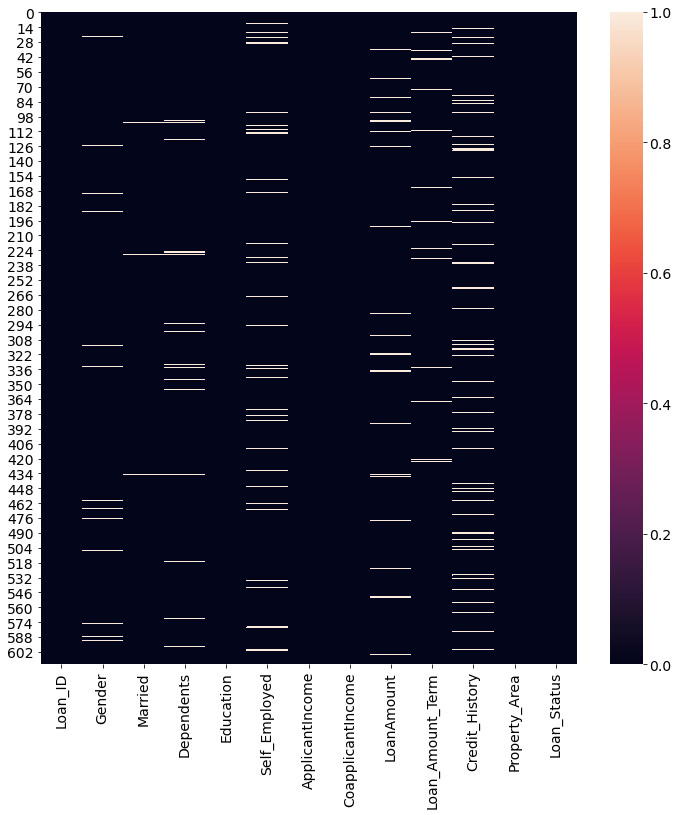

In [11]:
sns.heatmap(data.isnull())

In [12]:
for col in data.columns:
    if data[col].dtypes == 'object':
        data[col].fillna(data[col].mode()[0], inplace = True)
    else : 
        data[col].fillna(data[col].median(), inplace = True)

In [13]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<AxesSubplot:>

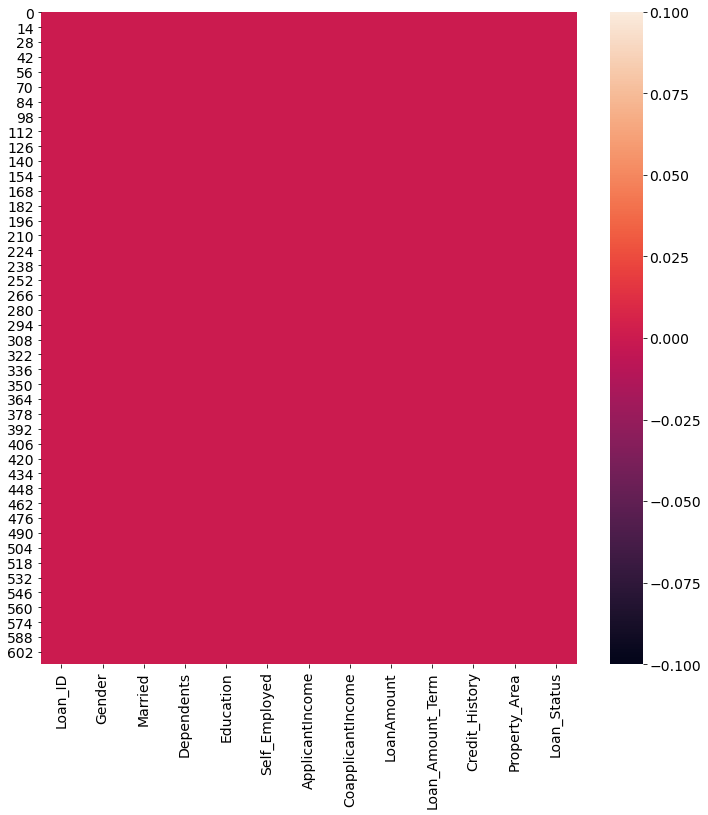

In [14]:
sns.heatmap(data.isnull())

# Segregating numerical and categorical variables

In [15]:
cat_col = data.select_dtypes(include = ['object']).columns
num_col = data.select_dtypes(exclude = ['object']).columns

In [16]:
data_cat = data[cat_col]
data_num = data[num_col]

In [17]:
data_cat

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,Urban,Y


# 

# Checking for null values

In [18]:
data_cat.isnull().sum()

Loan_ID          0
Gender           0
Married          0
Dependents       0
Education        0
Self_Employed    0
Property_Area    0
Loan_Status      0
dtype: int64

# Value counts of object variables

In [19]:
for col in data_cat:
    vc = data[col].value_counts()
    print(col)
    print(pd.DataFrame({'Counts' : vc}))
    print('')

Loan_ID
          Counts
LP001002       1
LP001806       1
LP001266       1
LP002281       1
LP002519       1
...          ...
LP001643       1
LP001864       1
LP002731       1
LP002928       1
LP002301       1

[614 rows x 1 columns]

Gender
        Counts
Male       502
Female     112

Married
     Counts
Yes     401
No      213

Dependents
    Counts
0      360
1      102
2      101
3+      51

Education
              Counts
Graduate         480
Not Graduate     134

Self_Employed
     Counts
No      532
Yes      82

Property_Area
           Counts
Semiurban     233
Urban         202
Rural         179

Loan_Status
   Counts
Y     422
N     192



**As per value counts Loan_ID is unique**

In [20]:
data_cat = data_cat.drop('Loan_ID', axis = 1)

# Visualizing the object variables

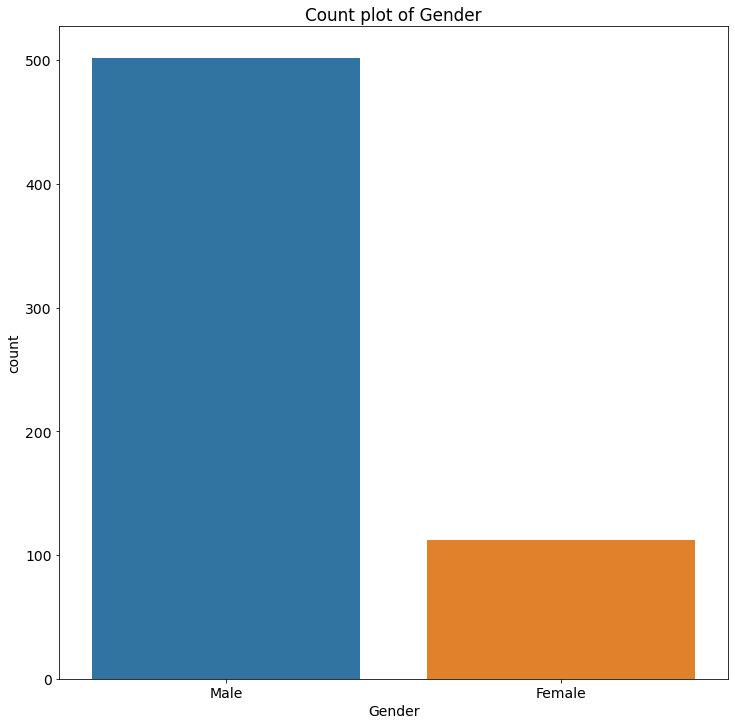

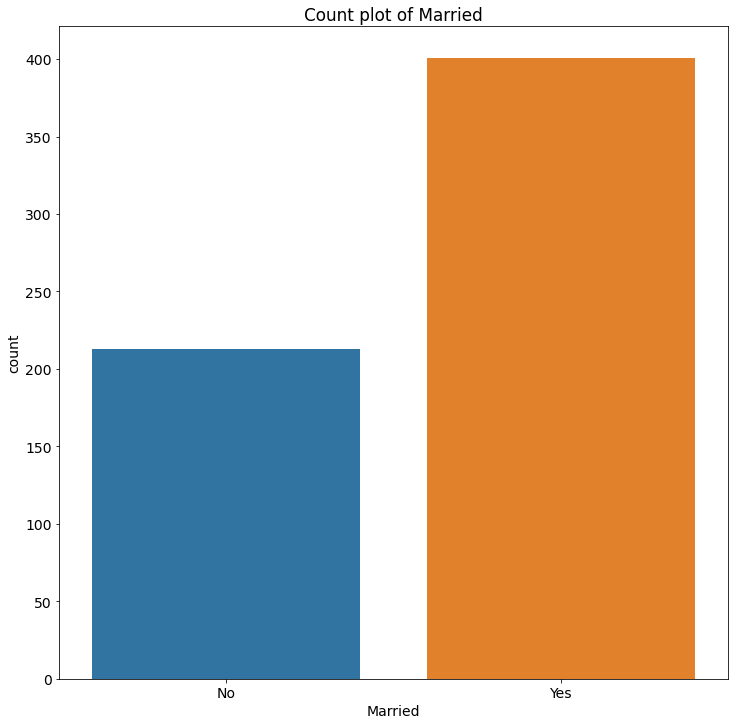

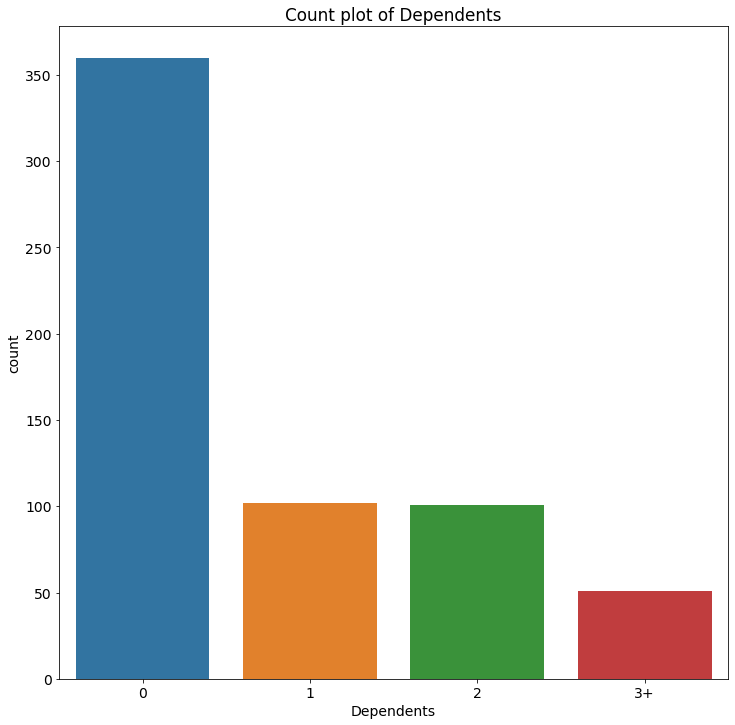

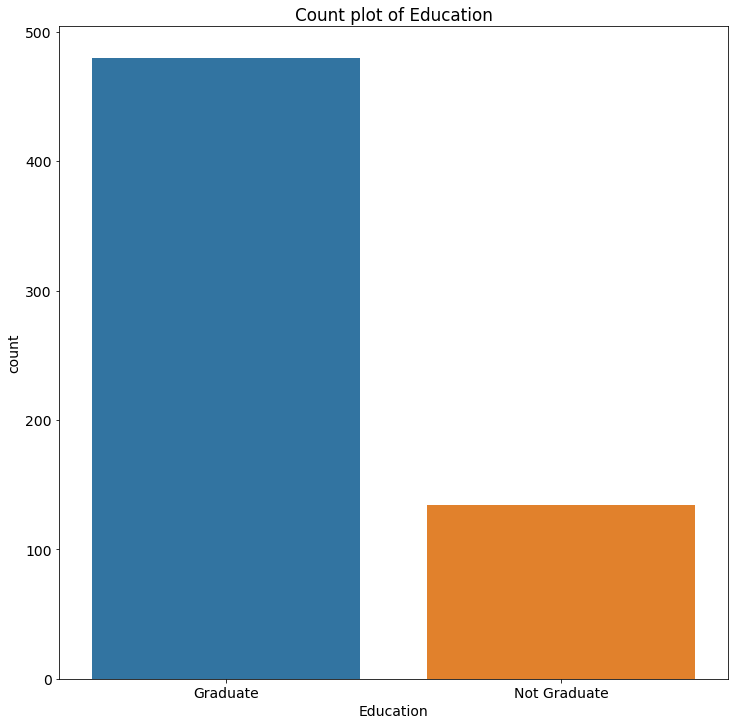

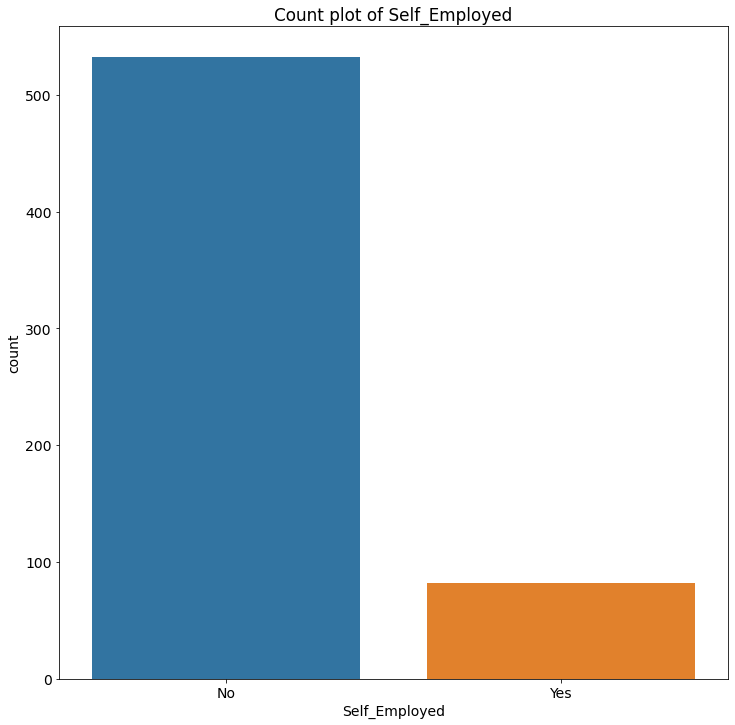

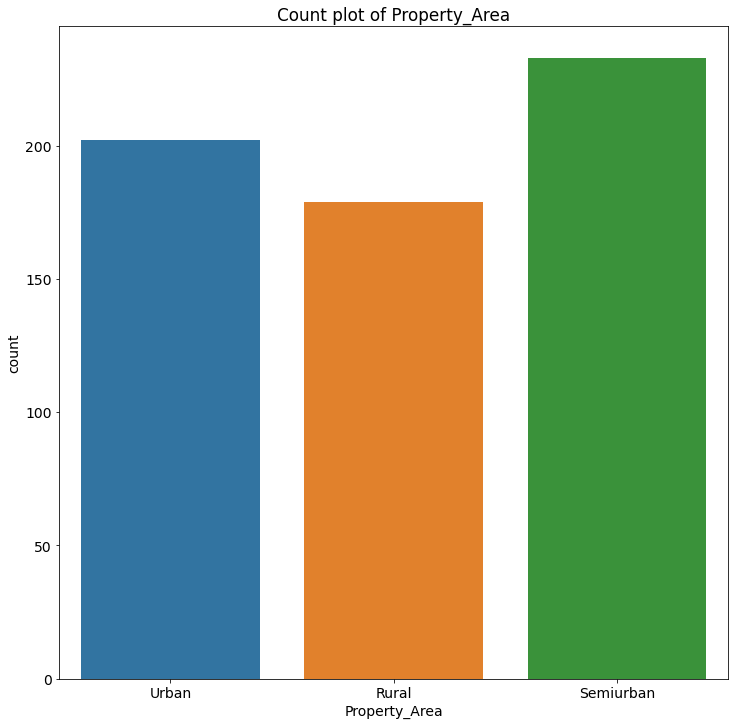

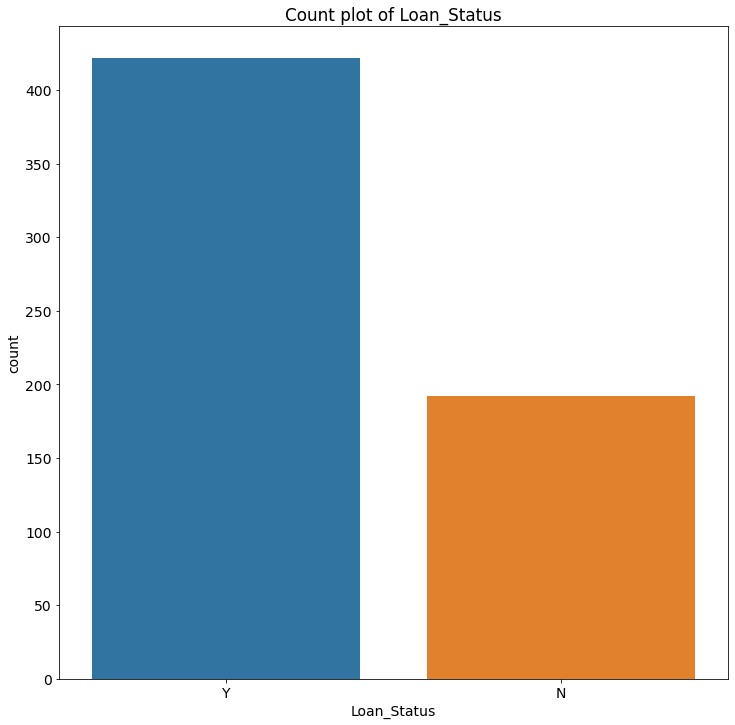

In [21]:
for col in data_cat:
    sns.countplot(data[col])
    plt.xlabel(col)
    plt.ylabel('count')
    plt.title('Count plot of {}'.format(col))
    plt.show()
    print('')

# Cross tab for object variable

In [22]:
for col in data_cat.columns[:-1]:
    print(col)
    ct = pd.crosstab(data[col], data.Loan_Status)
    print(chi2_contingency(ct, correction = False))
    print('')

Gender
(0.19864165509874285, 0.6558195040543224, 1, array([[ 35.0228013,  76.9771987],
       [156.9771987, 345.0228013]]))

Married
(5.1380701449230175, 0.02340665377837621, 1, array([[ 66.60586319, 146.39413681],
       [125.39413681, 275.60586319]]))

Dependents
(3.1513990012324227, 0.3688663081366005, 3, array([[112.5732899 , 247.4267101 ],
       [ 31.89576547,  70.10423453],
       [ 31.58306189,  69.41693811],
       [ 15.94788274,  35.05211726]]))

Education
(4.5288927351787684, 0.03332717442347583, 1, array([[150.09771987, 329.90228013],
       [ 41.90228013,  92.09771987]]))

Self_Employed
(0.008407648919431859, 0.9269417742799947, 1, array([[166.35830619, 365.64169381],
       [ 25.64169381,  56.35830619]]))

Property_Area
(12.297623130485675, 0.0021360187811644937, 2, array([[ 55.97394137, 123.02605863],
       [ 72.85993485, 160.14006515],
       [ 63.16612378, 138.83387622]]))



**As per chi-square Gender, Dependents and Self_Employed are NOT A GOOD PREDICTORS**

# Count plot for predict variable with response variable

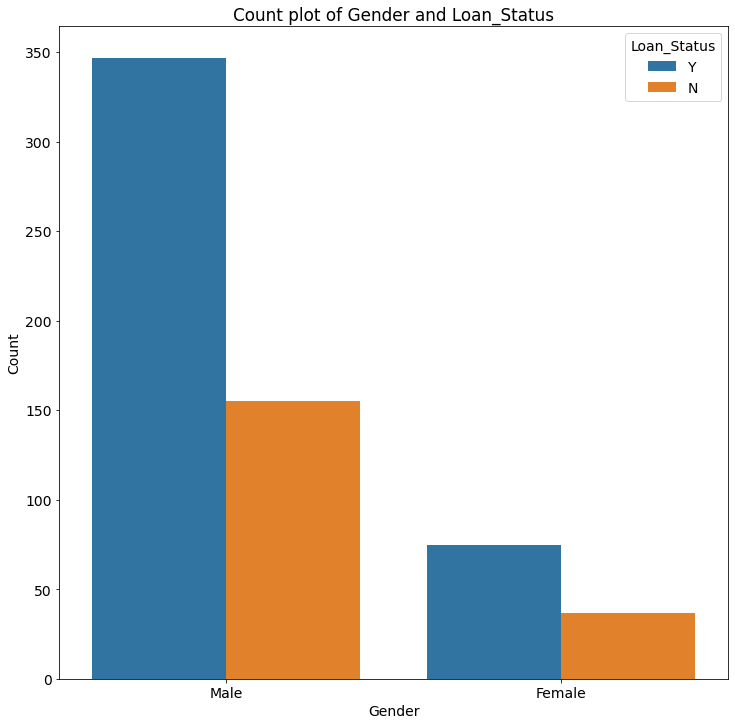

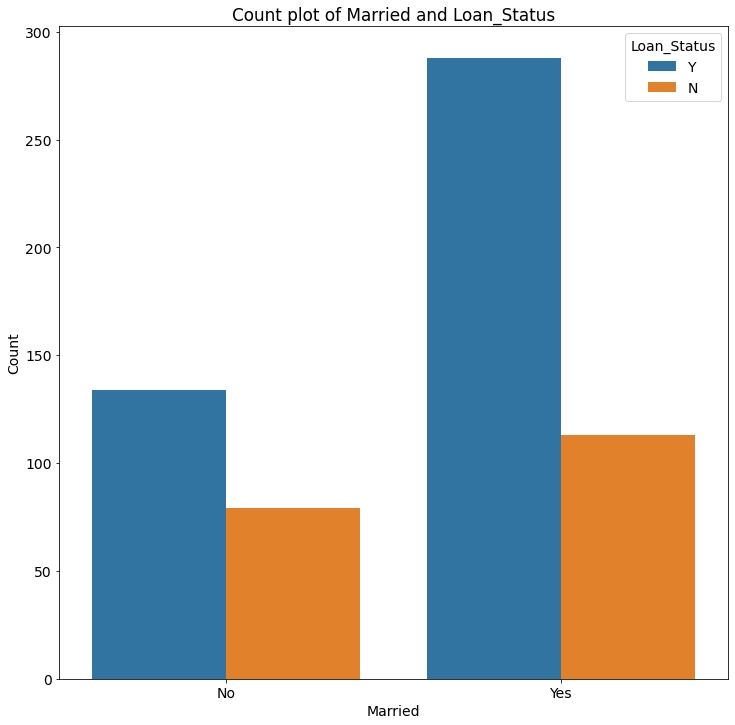

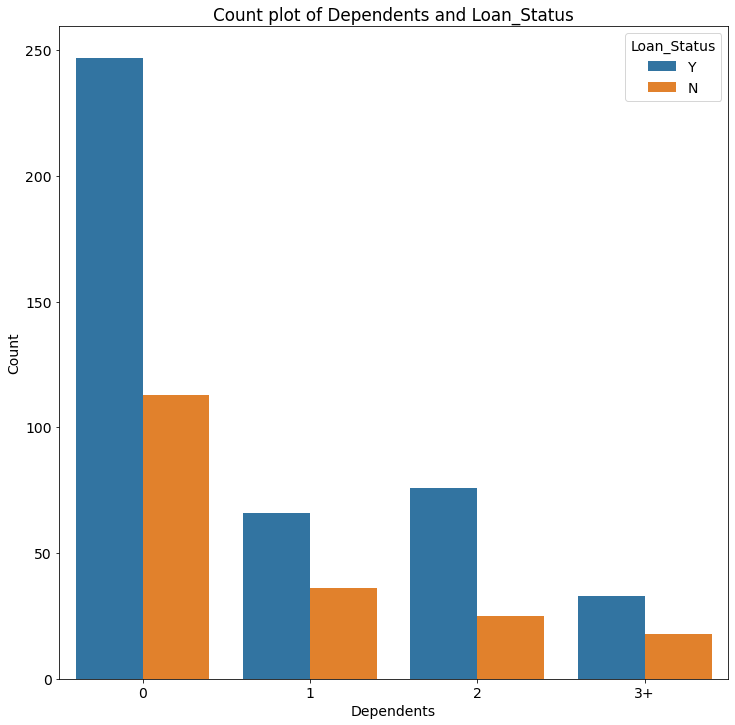

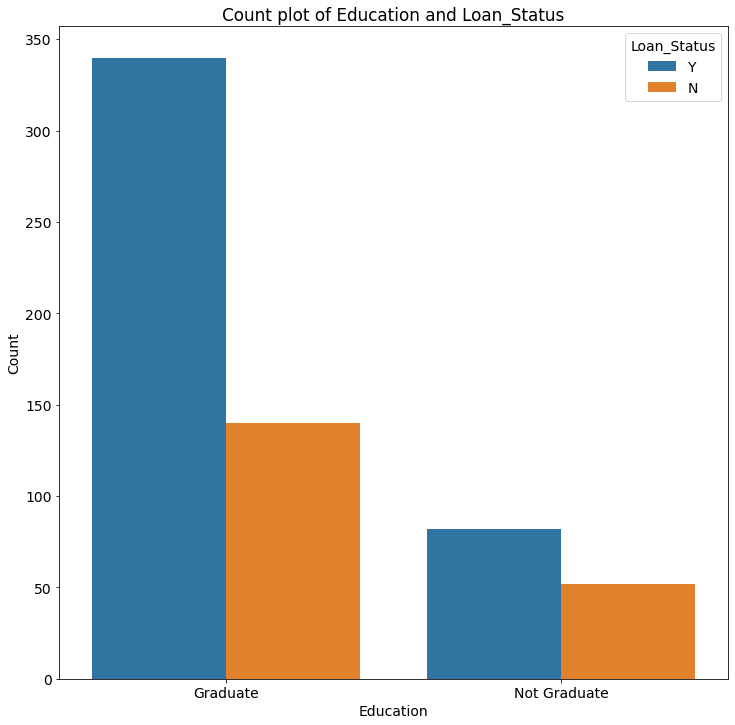

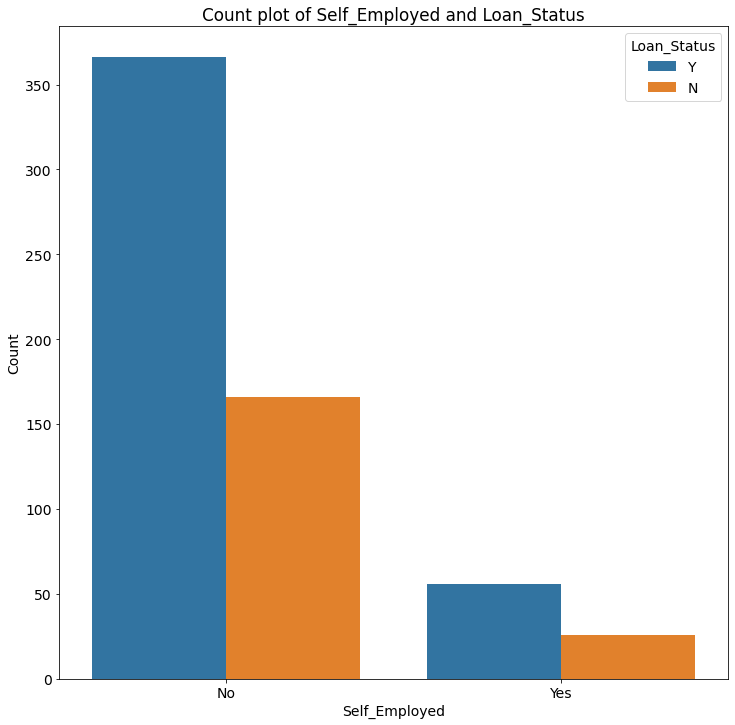

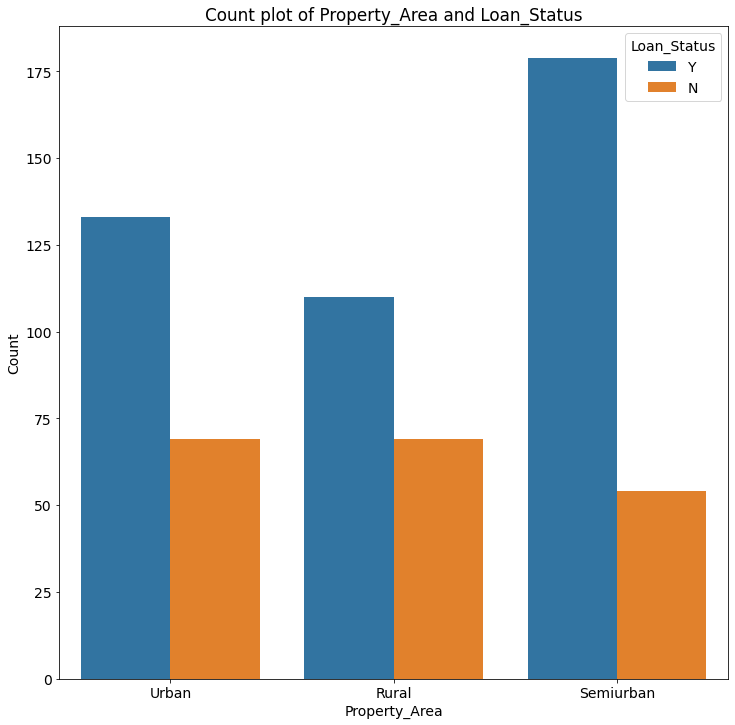

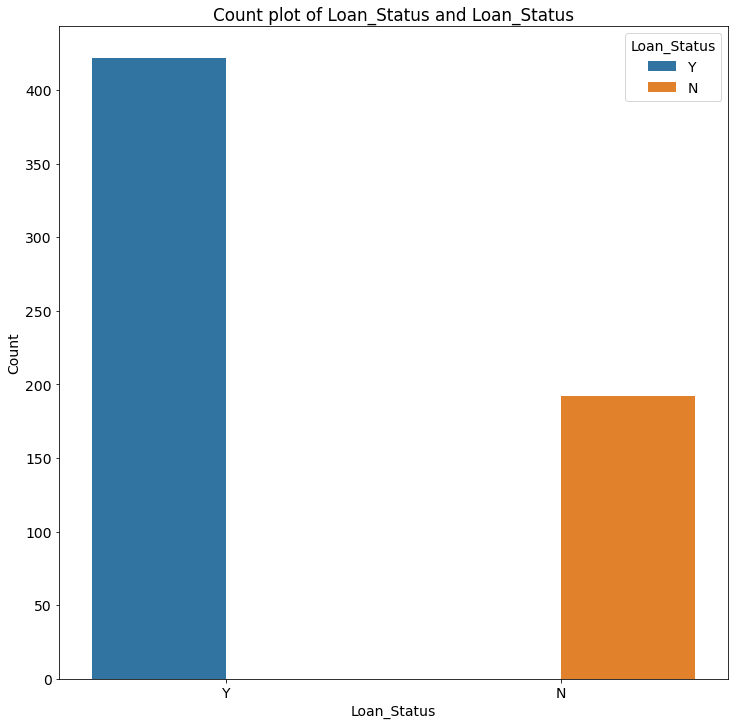

In [23]:
for col in data_cat[:-1]:
    sns.countplot(data[col], hue = data.Loan_Status)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.title('Count plot of {0} and Loan_Status'.format(col))
    plt.show()
    print('')

# 

# 

# Visualizing for continues variable

In [24]:
for col in data_num:
    vc = data[col].value_counts()
    print(col)
    print(pd.DataFrame({'Counts' : vc}))
    print('')

ApplicantIncome
      Counts
2500       9
6000       6
2600       6
4583       6
4166       5
...      ...
5503       1
3450       1
2425       1
2423       1
4095       1

[505 rows x 1 columns]

CoapplicantIncome
        Counts
0.0        273
2500.0       5
2083.0       5
1666.0       5
1625.0       3
...        ...
2365.0       1
1695.0       1
2466.0       1
2375.0       1
1700.0       1

[287 rows x 1 columns]

LoanAmount
       Counts
128.0      33
120.0      20
110.0      17
100.0      15
160.0      12
...       ...
211.0       1
250.0       1
62.0        1
85.0        1
436.0       1

[203 rows x 1 columns]

Loan_Amount_Term
       Counts
360.0     526
180.0      44
480.0      15
300.0      13
84.0        4
240.0       4
120.0       3
36.0        2
60.0        2
12.0        1

Credit_History
     Counts
1.0     525
0.0      89



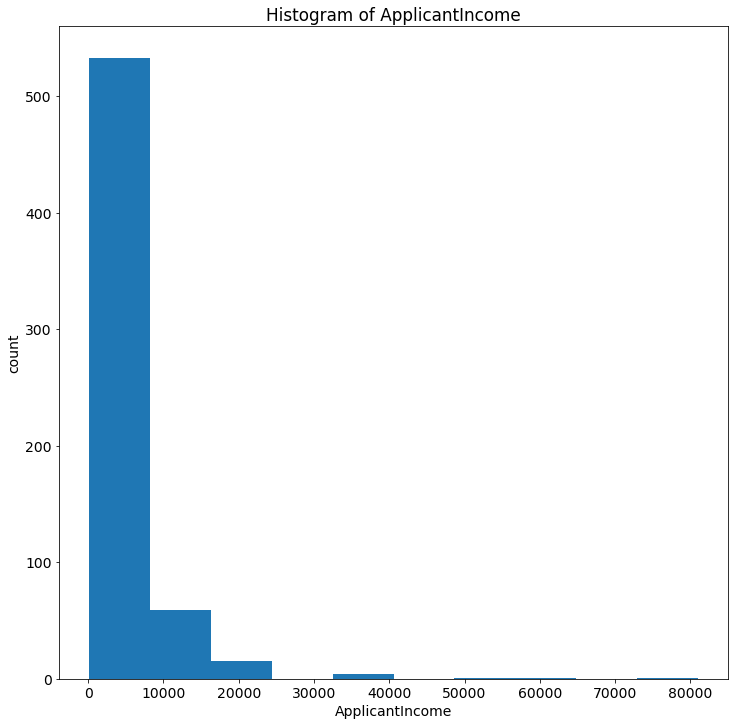

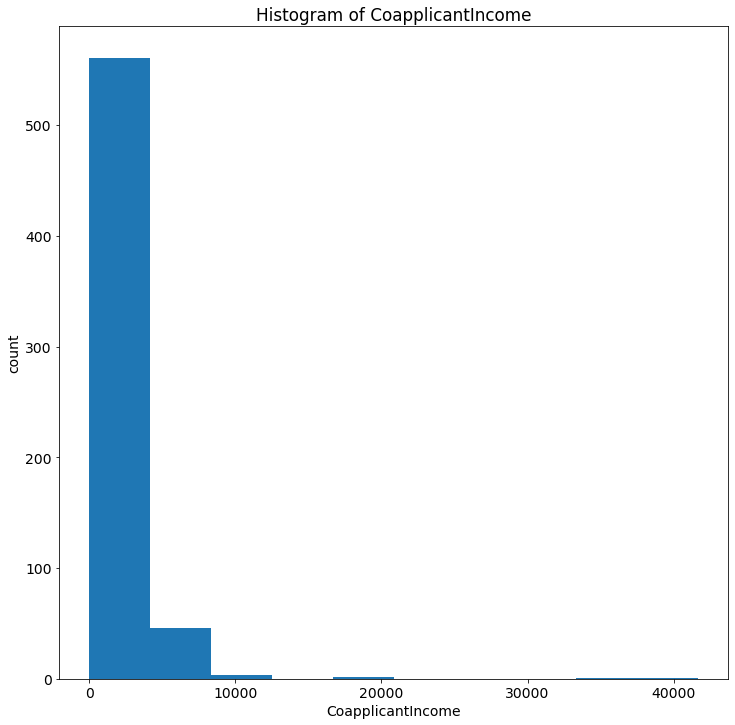

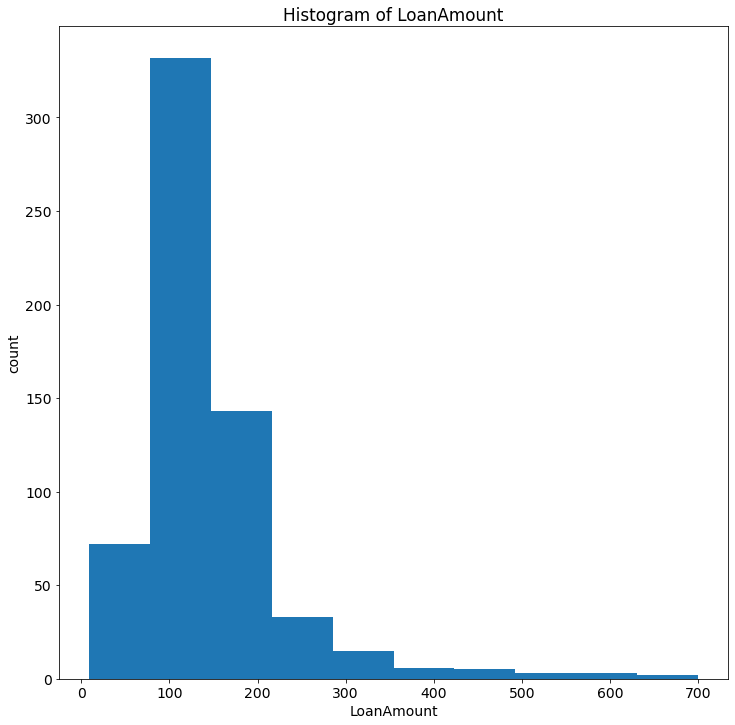

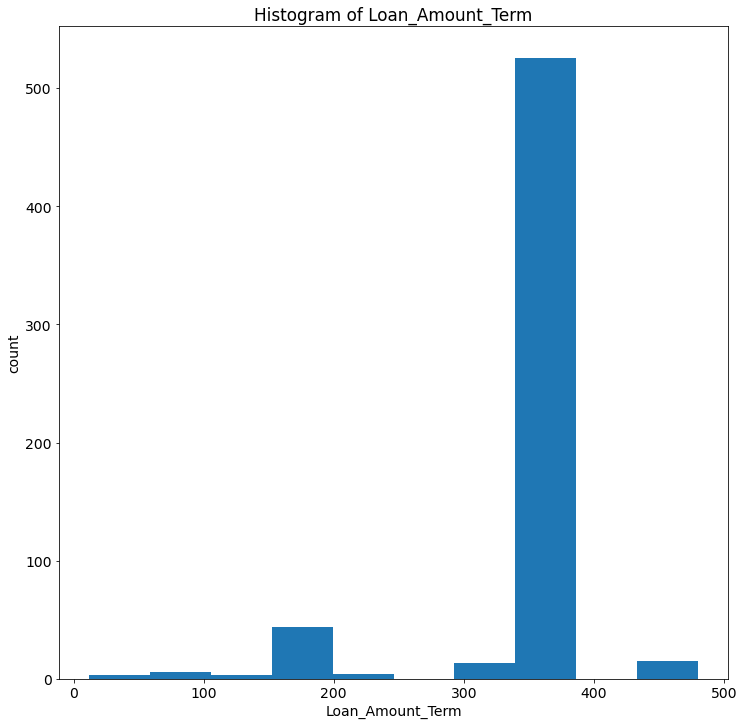

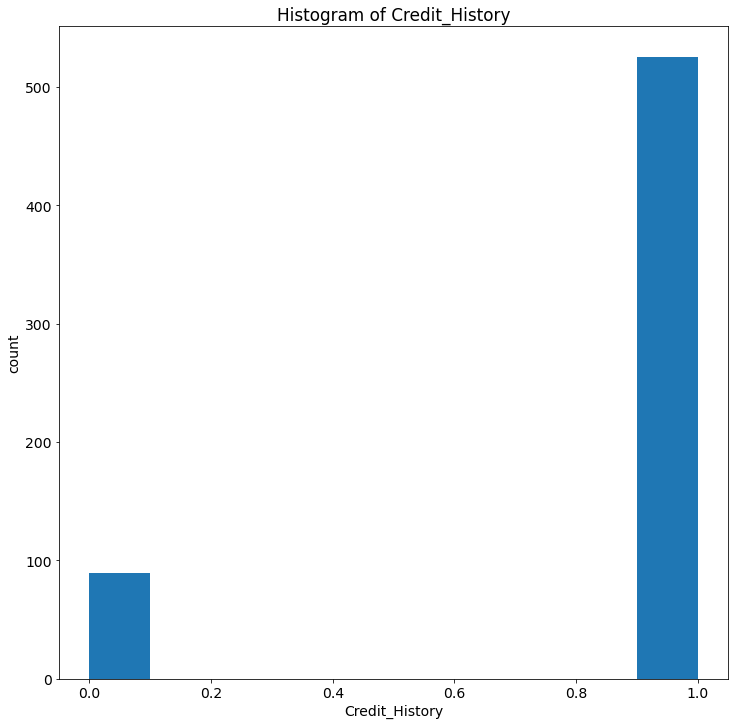

In [25]:
for col in data_num:
    plt.hist(data[col])
    plt.xlabel(col)
    plt.ylabel('count')
    plt.title('Histogram of {}'.format(col))
    plt.show()
    print('')

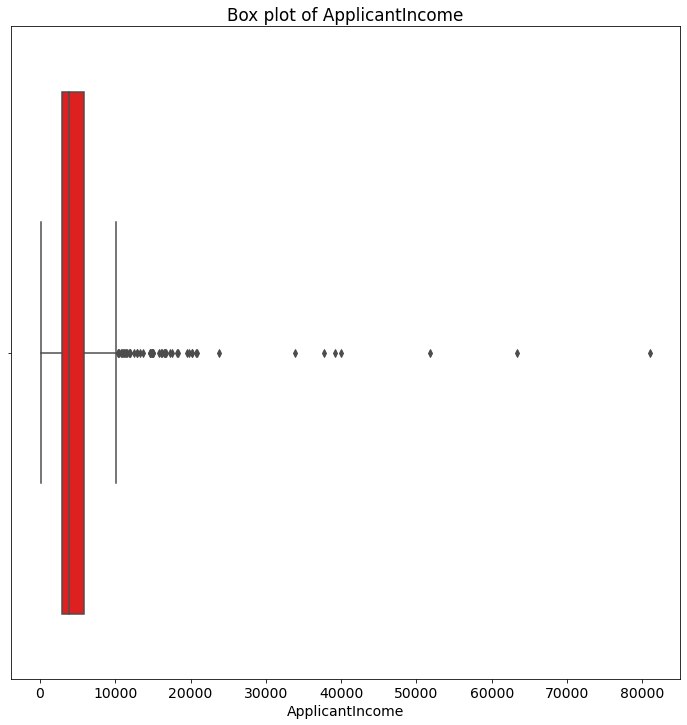

IQR of ApplicantIncome is 2917.5
Upper_limit of ApplicantIncome is 10171.25
Lower_limit of ApplicantIncome is -1498.75
Length of Upper_limit of ApplicantIncome is 50
Length of Lower_limit of ApplicantIncome is 0



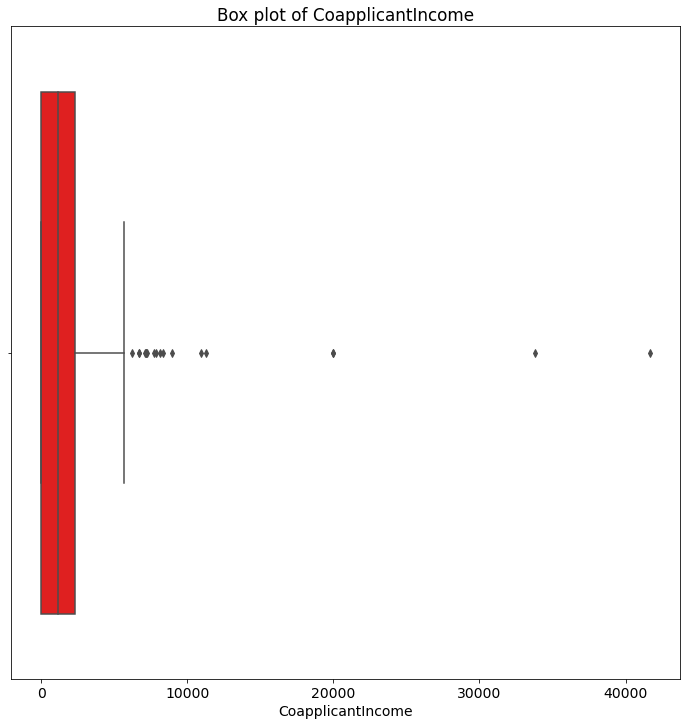

IQR of CoapplicantIncome is 2297.25
Upper_limit of CoapplicantIncome is 5743.125
Lower_limit of CoapplicantIncome is -3445.875
Length of Upper_limit of CoapplicantIncome is 18
Length of Lower_limit of CoapplicantIncome is 0



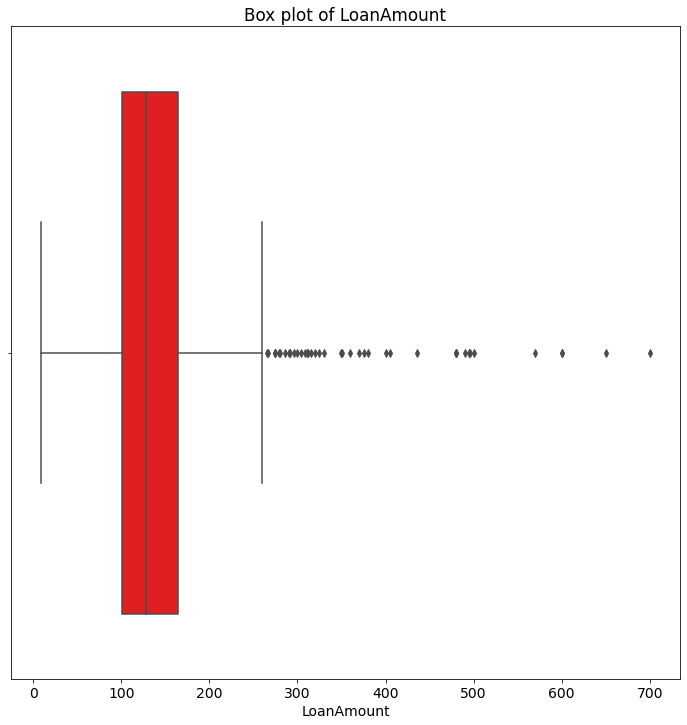

IQR of LoanAmount is 64.5
Upper_limit of LoanAmount is 261.5
Lower_limit of LoanAmount is 3.5
Length of Upper_limit of LoanAmount is 41
Length of Lower_limit of LoanAmount is 0



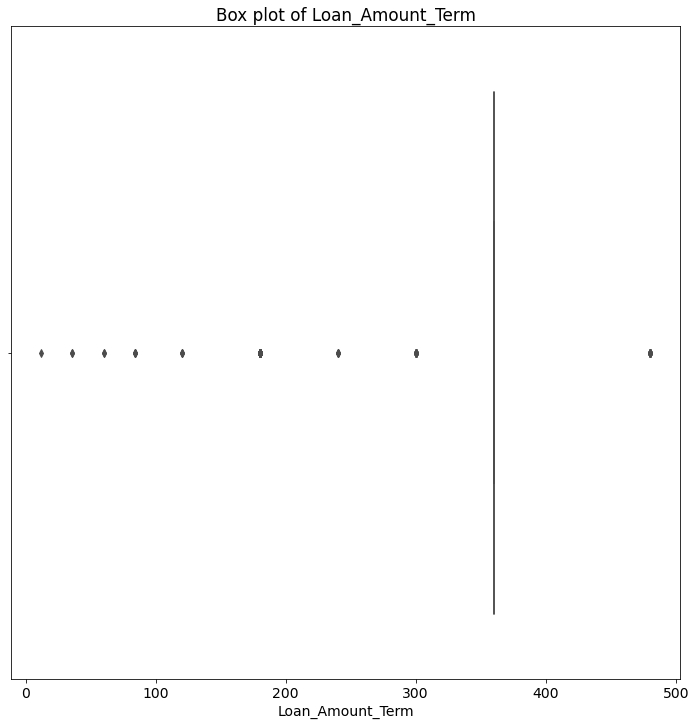

IQR of Loan_Amount_Term is 0.0
Upper_limit of Loan_Amount_Term is 360.0
Lower_limit of Loan_Amount_Term is 360.0
Length of Upper_limit of Loan_Amount_Term is 15
Length of Lower_limit of Loan_Amount_Term is 73



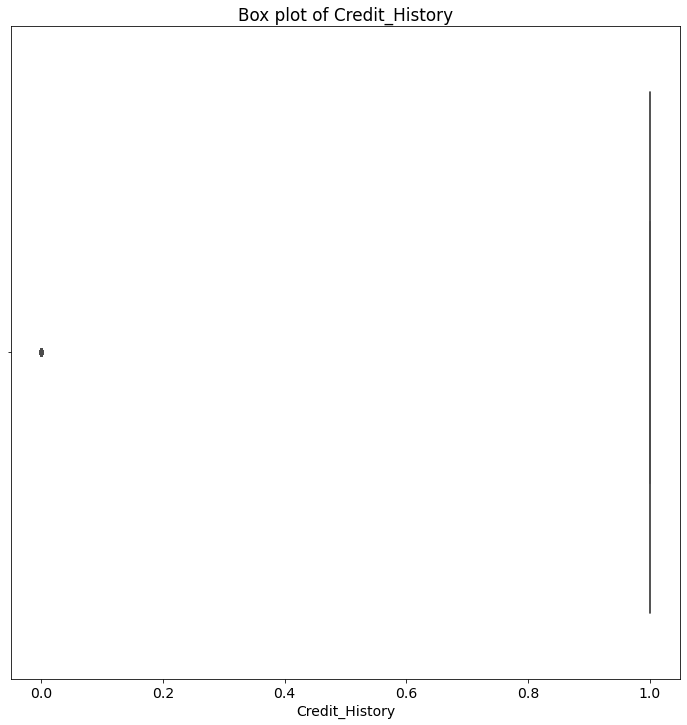

IQR of Credit_History is 0.0
Upper_limit of Credit_History is 1.0
Lower_limit of Credit_History is 1.0
Length of Upper_limit of Credit_History is 0
Length of Lower_limit of Credit_History is 89



In [26]:
for col in data_num:
    sns.boxplot(data[col], color = 'r')
    plt.xlabel(col)
    plt.title('Box plot of {}'.format(col))
    plt.show()
    IQR = data[col].quantile(0.75)-data[col].quantile(0.25)
    print(f'IQR of {col} is {IQR}')
    upper_limit= data[col].quantile(0.75)+ (1.5*IQR)
    print(f'Upper_limit of {col} is {upper_limit}')
    lower_limit= data[col].quantile(0.25)- (1.5*IQR)
    print(f'Lower_limit of {col} is {lower_limit}')
    length_upper = len(data[col][data[col]>upper_limit])
    print(f'Length of Upper_limit of {col} is {length_upper}')
    length_lower = len(data[col][data[col]<lower_limit])
    print(f'Length of Lower_limit of {col} is {length_lower}')
    print('')

In [27]:
data['ApplicantIncome'] = np.where(data['ApplicantIncome']>10171.25, 10171.25, data['ApplicantIncome']) 
data['CoapplicantIncome'] = np.where(data['CoapplicantIncome']>5743.125, 5743.125, data['CoapplicantIncome']) 
data['LoanAmount'] = np.where(data['LoanAmount']>261.5, 261.5, data['LoanAmount']) 
data['Loan_Amount_Term'] = np.where(data['Loan_Amount_Term']>360.0, 360.0, data['Loan_Amount_Term']) 
data['Loan_Amount_Term'] = np.where(data['Loan_Amount_Term']<360.0, 360.0, data['Loan_Amount_Term']) 
data['Credit_History'] = np.where(data['Credit_History']<1.0, 1.0, data['Credit_History']) 

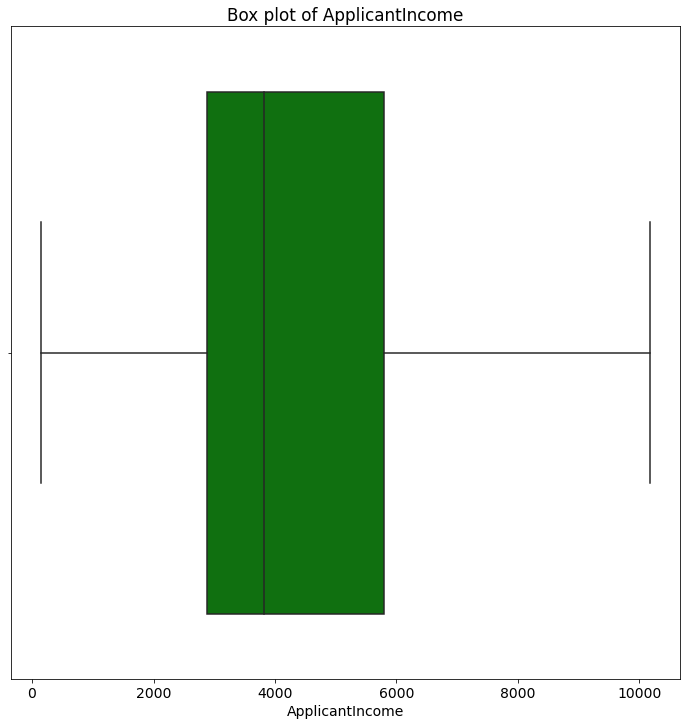

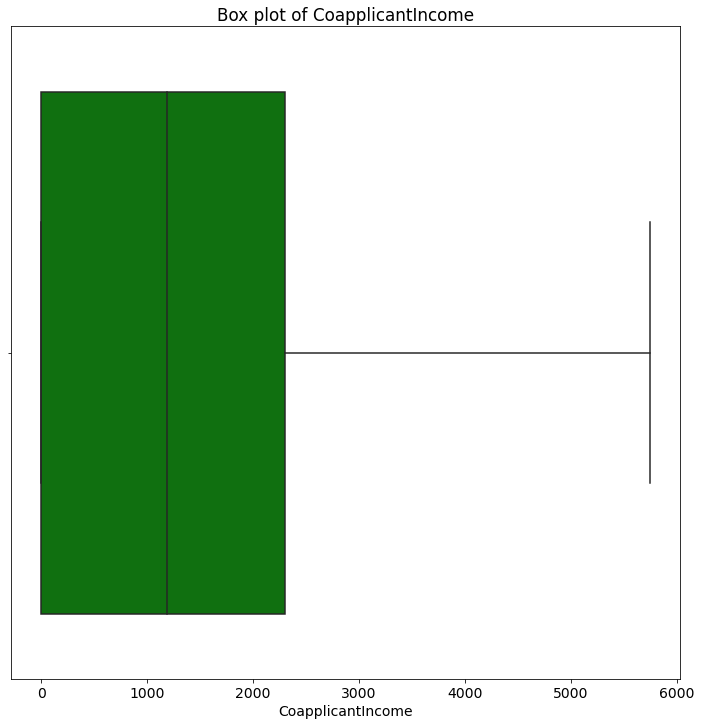

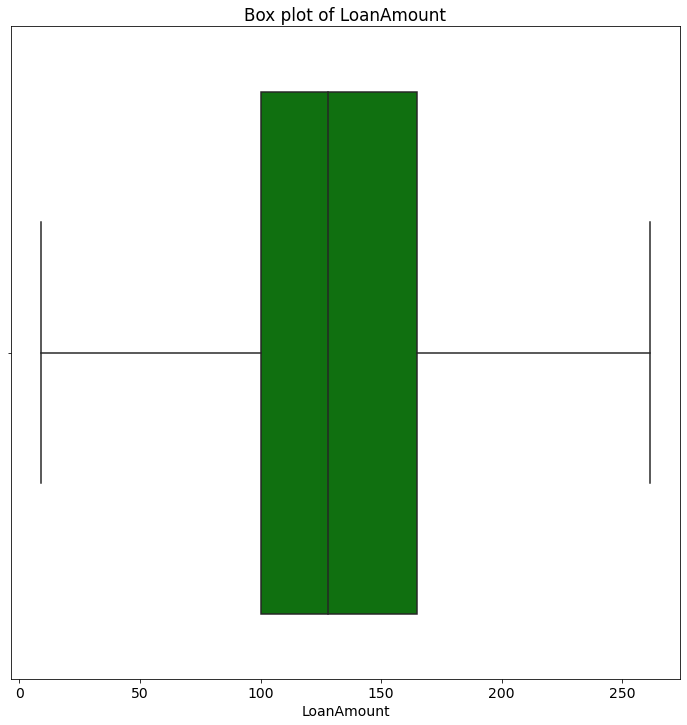

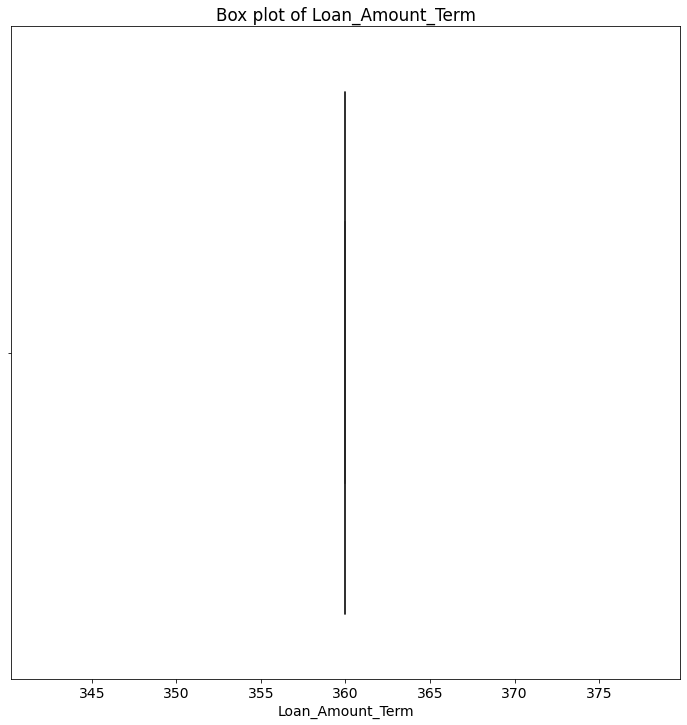

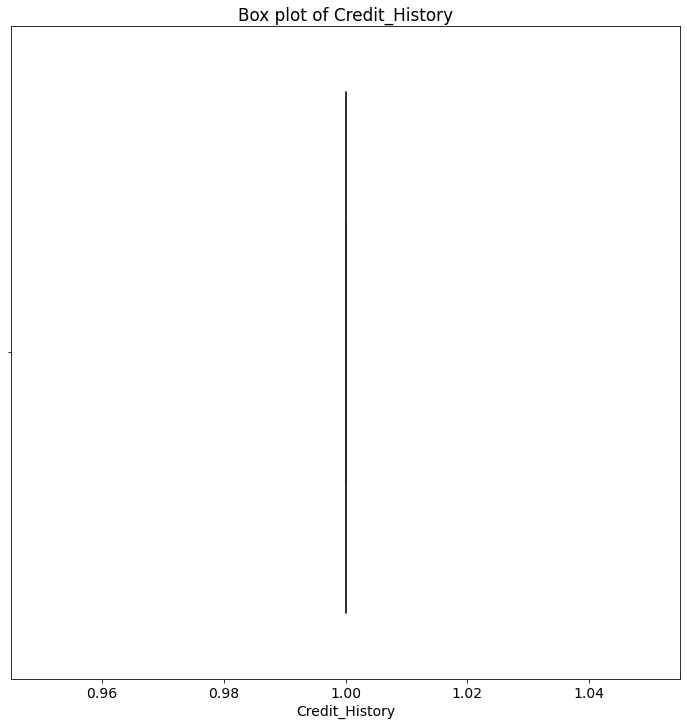

In [28]:
for col in data_num:
    sns.boxplot(data[col], color = 'g')
    plt.xlabel(col)
    plt.title('Box plot of {}'.format(col))
    plt.show()
    print('')

# Statistical test

In [29]:
cat_1 = data[data['Loan_Status'] == 'N']
cat_2 = data[data['Loan_Status'] == 'Y'] 
for col in data_num.columns:
    print(col)
    print(ttest_ind(cat_1[col], cat_2[col]))
    print('')

ApplicantIncome
Ttest_indResult(statistic=0.010937416980115305, pvalue=0.9912769421981265)

CoapplicantIncome
Ttest_indResult(statistic=-0.2964606397999629, pvalue=0.7669788988824243)

LoanAmount
Ttest_indResult(statistic=1.1705127803025461, pvalue=0.24225025694780314)

Loan_Amount_Term
Ttest_indResult(statistic=nan, pvalue=nan)

Credit_History
Ttest_indResult(statistic=nan, pvalue=nan)



# 

# 

In [30]:
data = pd.read_csv('D:/Machine Learning/Kaggle Project/Loan Applicant/LoanApplicantData.csv')

# Label Enocoding

In [31]:
label_encoder = preprocessing.LabelEncoder()

In [32]:
data1 = pd.DataFrame()
for col in data.columns:
    data1[col] = label_encoder.fit_transform(data[col])

# 

# Train Test Split

In [33]:
x = data1.drop(['Loan_ID', 'Loan_Status'], axis = 1)
y = data1['Loan_Status']

In [34]:
x.shape

(614, 11)

In [35]:
y.shape

(614,)

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .2, random_state = 100)

In [37]:
x_train.shape

(491, 11)

In [38]:
x_test.shape

(123, 11)

# 

# Join horizontally x_train and y_train

In [39]:
train = x_train.join(y_train)

In [40]:
train.shape

(491, 12)

# Join horizontally x_test and y_test

In [41]:
test = x_test.join(y_test)

In [42]:
test.shape

(123, 12)

# 

# Count the imbalanced categories

In [43]:
status_n = train[train.Loan_Status == 0]
len(status_n)

144

In [44]:
status_y = train[train.Loan_Status == 1]
len(status_y)

347

# 

# Make minority class = majority class

In [45]:
status_nos = resample(status_n, replace = True, n_samples = len(status_y), random_state = 277)

In [46]:
train_os = pd.concat([status_nos, status_y])

In [47]:
train_os.Loan_Status.value_counts()

0    347
1    347
Name: Loan_Status, dtype: int64

In [48]:
train_os.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# 

# Now make oversampled x_train(os) & y_train(os)

In [49]:
x_trainos = train_os.loc[:, train_os.columns != 'Loan_Status']
y_trainos = train_os.loc[:, train_os.columns == 'Loan_Status']

In [50]:
x_trainos.shape

(694, 11)

In [51]:
y_trainos.shape

(694, 1)

# 

# 

# Decision Tree

In [52]:
clf = tree.DecisionTreeClassifier()

In [53]:
clfFit = clf.fit(x_trainos, y_trainos)

In [54]:
clfFit

DecisionTreeClassifier()

# 

[Text(184.18389356946355, 634.2, 'X[9] <= 0.5\ngini = 0.5\nsamples = 694\nvalue = [347, 347]'),
 Text(55.262723521320495, 597.96, 'X[6] <= 278.5\ngini = 0.048\nsamples = 161\nvalue = [157, 4]'),
 Text(36.84181568088033, 561.72, 'X[7] <= 112.5\ngini = 0.037\nsamples = 159\nvalue = [156, 3]'),
 Text(22.1050894085282, 525.48, 'X[5] <= 88.0\ngini = 0.015\nsamples = 130\nvalue = [129, 1]'),
 Text(14.736726272352133, 489.24, 'X[8] <= 6.0\ngini = 0.091\nsamples = 21\nvalue = [20, 1]'),
 Text(7.368363136176066, 453.0, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(22.1050894085282, 453.0, 'gini = 0.0\nsamples = 20\nvalue = [20, 0]'),
 Text(29.473452544704266, 489.24, 'gini = 0.0\nsamples = 109\nvalue = [109, 0]'),
 Text(51.57854195323247, 525.48, 'X[7] <= 114.5\ngini = 0.128\nsamples = 29\nvalue = [27, 2]'),
 Text(44.2101788170564, 489.24, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(58.94690508940853, 489.24, 'X[1] <= 0.5\ngini = 0.069\nsamples = 28\nvalue = [27, 1]'),
 Text(51.578541

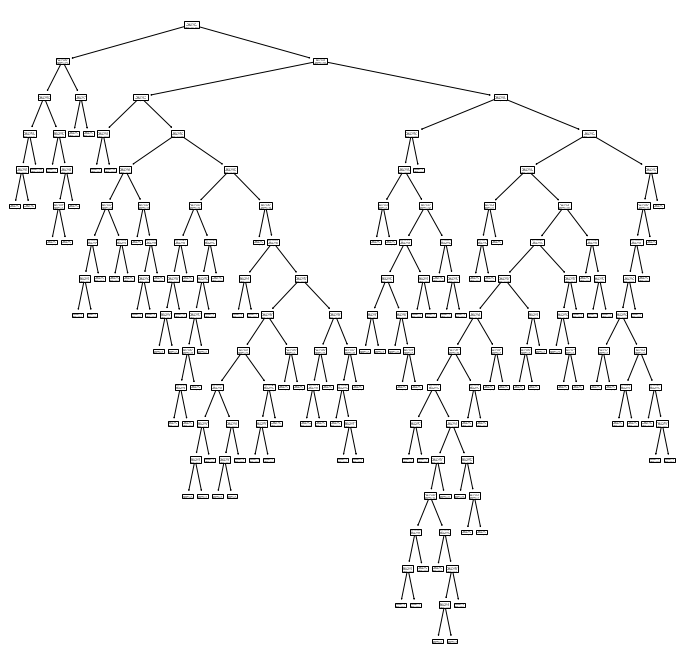

In [55]:
tree.plot_tree(clfFit)

# 

In [56]:
y_pred = clfFit.predict(x_test)

In [57]:
cm_tree = pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames = ['Predicted'], margins = True)

In [58]:
cm_tree

Predicted,0,1,All
Actual,,,
0,26,22,48
1,18,57,75
All,44,79,123


# 

In [59]:
confusion_matrix(y_test, y_pred)

array([[26, 22],
       [18, 57]], dtype=int64)

In [60]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.59      0.54      0.57        48
           1       0.72      0.76      0.74        75

    accuracy                           0.67       123
   macro avg       0.66      0.65      0.65       123
weighted avg       0.67      0.67      0.67       123



# 

In [61]:
accuracy_score(y_test, y_pred)

0.6747967479674797

# 

In [62]:
predictedProbability_tree = clfFit.predict_proba(x_test)[:, 1]

In [63]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, predictedProbability_tree)

In [64]:
fpr

array([0.        , 0.45833333, 1.        ])

In [65]:
tpr

array([0.  , 0.76, 1.  ])

In [66]:
thresholds

array([2., 1., 0.])

In [67]:
df = pd.DataFrame(dict(fpr = fpr, tpr = tpr))

In [68]:
auc = metrics.auc(fpr, tpr)

In [69]:
auc

0.6508333333333334

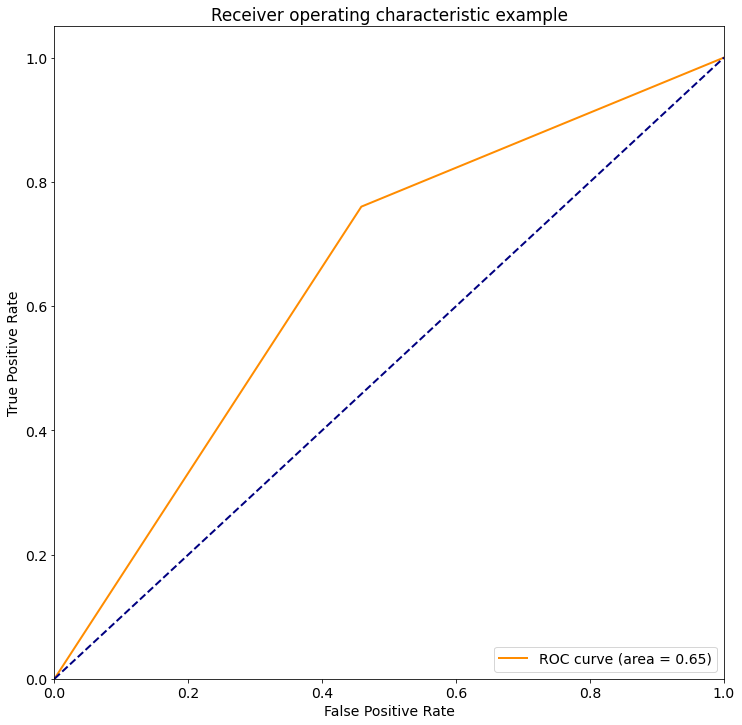

In [70]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color = 'darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc = 'lower right')
plt.show()

# 

# 

# Find optimum no of depth

In [71]:
depth = np.arange(4,17,1)

auc_train, auc_test = [],[]

for i in depth:
    prdctr = tree.DecisionTreeClassifier(max_depth = i)
    prdctr.fit(x_trainos, y_trainos)
    y_train_pred = prdctr.predict(x_trainos)
    y_test_pred = prdctr.predict(x_test)
    
    
    auc_train.append(accuracy_score(y_trainos, y_train_pred))
    auc_test.append(accuracy_score(y_test, y_test_pred))

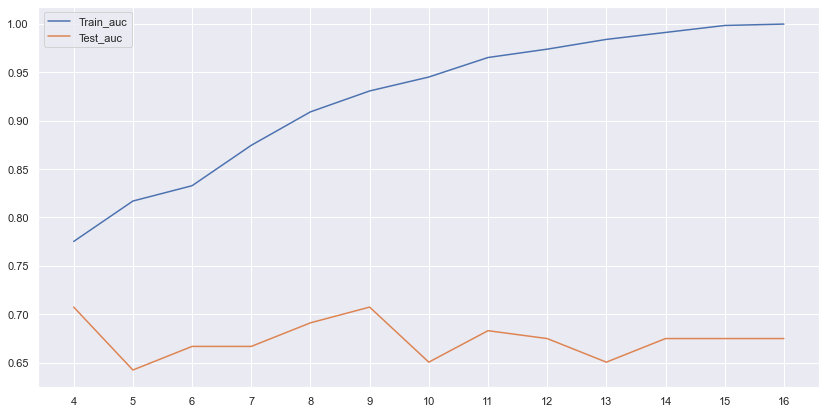

In [72]:
sns.set()
plt.figure(figsize = (14, 7))
sns.lineplot(y = auc_train, x = depth, label = 'Train_auc')
sns.lineplot(y = auc_test, x = depth, label = 'Test_auc')
plt.xticks(ticks = np.arange(4,17,1))
plt.show()

**Finalize tree with 9 depth**

# 

# 

# Random Forest Classification

In [73]:
Classifier = RandomForestClassifier(n_estimators = 100, max_depth = 9, random_state = 0)

In [74]:
mod = Classifier.fit(x_trainos, y_trainos)

In [75]:
y_pred = mod.predict(x_test)

In [76]:
confusion_matrix(y_test, y_pred)

array([[21, 27],
       [ 7, 68]], dtype=int64)

In [77]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.44      0.55        48
           1       0.72      0.91      0.80        75

    accuracy                           0.72       123
   macro avg       0.73      0.67      0.68       123
weighted avg       0.73      0.72      0.70       123



In [78]:
predictedProbability_tree = mod.predict_proba(x_test)[:, 1]

In [79]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, predictedProbability_tree)

In [80]:
fpr

array([0.        , 0.02083333, 0.02083333, 0.04166667, 0.04166667,
       0.08333333, 0.08333333, 0.10416667, 0.10416667, 0.125     ,
       0.125     , 0.20833333, 0.20833333, 0.25      , 0.25      ,
       0.27083333, 0.27083333, 0.29166667, 0.29166667, 0.3125    ,
       0.3125    , 0.33333333, 0.33333333, 0.35416667, 0.35416667,
       0.375     , 0.375     , 0.41666667, 0.41666667, 0.4375    ,
       0.4375    , 0.45833333, 0.45833333, 0.47916667, 0.47916667,
       0.5       , 0.5       , 0.5625    , 0.5625    , 0.58333333,
       0.58333333, 0.60416667, 0.60416667, 0.625     , 0.625     ,
       0.64583333, 0.64583333, 0.75      , 0.75      , 0.97916667,
       0.97916667, 1.        ])

In [81]:
tpr

array([0.        , 0.        , 0.10666667, 0.10666667, 0.16      ,
       0.16      , 0.18666667, 0.18666667, 0.32      , 0.32      ,
       0.33333333, 0.33333333, 0.34666667, 0.34666667, 0.38666667,
       0.38666667, 0.41333333, 0.41333333, 0.45333333, 0.45333333,
       0.49333333, 0.49333333, 0.50666667, 0.50666667, 0.6       ,
       0.6       , 0.64      , 0.64      , 0.69333333, 0.69333333,
       0.73333333, 0.73333333, 0.81333333, 0.81333333, 0.82666667,
       0.82666667, 0.88      , 0.88      , 0.90666667, 0.90666667,
       0.93333333, 0.93333333, 0.94666667, 0.94666667, 0.96      ,
       0.96      , 0.97333333, 0.97333333, 0.98666667, 0.98666667,
       1.        , 1.        ])

In [82]:
thresholds

array([1.93432895, 0.93432895, 0.89749752, 0.89608182, 0.87407115,
       0.8631242 , 0.85265811, 0.84810135, 0.81551012, 0.81049485,
       0.79216801, 0.78824968, 0.78653195, 0.7822119 , 0.76428701,
       0.76400391, 0.76034699, 0.7471385 , 0.73512698, 0.73405262,
       0.72481644, 0.716987  , 0.7166315 , 0.71657975, 0.688895  ,
       0.68447775, 0.67283006, 0.67071623, 0.66321747, 0.6596296 ,
       0.64140832, 0.63278941, 0.59314835, 0.57834875, 0.57724997,
       0.57251996, 0.5262552 , 0.50879331, 0.50068723, 0.47736032,
       0.42515595, 0.389375  , 0.38318476, 0.31069763, 0.26063668,
       0.24032381, 0.23952381, 0.13963642, 0.11133968, 0.0438498 ,
       0.04116071, 0.0244958 ])

In [83]:
auc = metrics.auc(fpr, tpr)

In [84]:
auc

0.6930555555555555

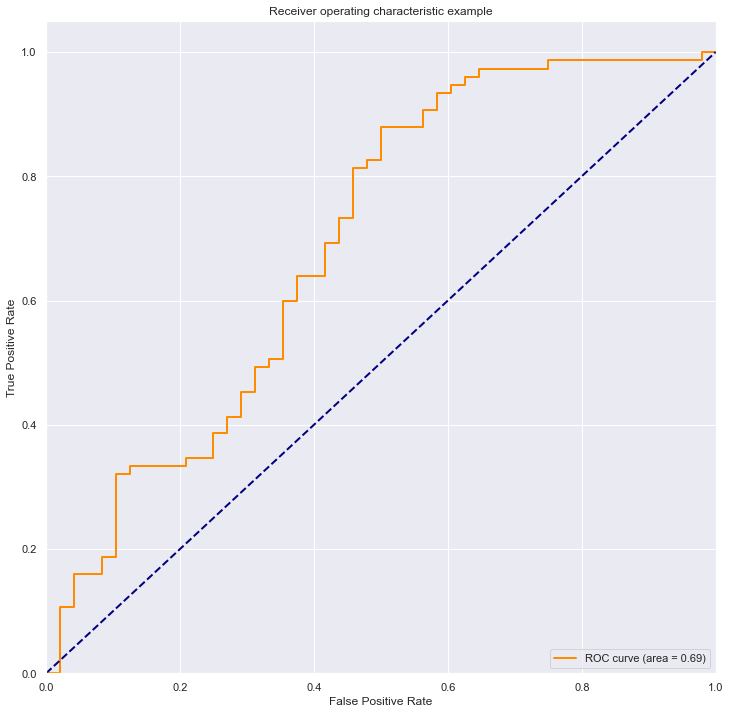

In [85]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color = 'darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc = 'lower right')
plt.show()

# 

In [86]:
fi = pd.DataFrame({'feature' : list(x_trainos.columns),
                   'importance' : mod.feature_importances_}).sort_values('importance', ascending = False)
fi

,feature,importance
9,Credit_History,0.341779
7,LoanAmount,0.151787
5,ApplicantIncome,0.147541
6,CoapplicantIncome,0.107890
10,Property_Area,0.055345
8,Loan_Amount_Term,0.045603
1,Married,0.040769
2,Dependents,0.038556
4,Self_Employed,0.025518
3,Education,0.023485


# 

### Model with Credit_History, LoanAmount, ApplicantIncome and CoapplicantIncome

In [87]:
classifier = RandomForestClassifier(n_estimators = 100, max_depth = 9, random_state = 0)

In [88]:
x_trainos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 694 entries, 401 to 520
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Gender             694 non-null    int32
 1   Married            694 non-null    int32
 2   Dependents         694 non-null    int32
 3   Education          694 non-null    int32
 4   Self_Employed      694 non-null    int32
 5   ApplicantIncome    694 non-null    int64
 6   CoapplicantIncome  694 non-null    int64
 7   LoanAmount         694 non-null    int64
 8   Loan_Amount_Term   694 non-null    int64
 9   Credit_History     694 non-null    int64
 10  Property_Area      694 non-null    int32
dtypes: int32(6), int64(5)
memory usage: 48.8 KB


In [89]:
x_trainos1 = x_trainos.iloc[:, [9,7,5,6]]

In [90]:
mod1 = classifier.fit(x_trainos1, y_trainos)

In [91]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123 entries, 253 to 175
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Gender             123 non-null    int32
 1   Married            123 non-null    int32
 2   Dependents         123 non-null    int32
 3   Education          123 non-null    int32
 4   Self_Employed      123 non-null    int32
 5   ApplicantIncome    123 non-null    int64
 6   CoapplicantIncome  123 non-null    int64
 7   LoanAmount         123 non-null    int64
 8   Loan_Amount_Term   123 non-null    int64
 9   Credit_History     123 non-null    int64
 10  Property_Area      123 non-null    int32
dtypes: int32(6), int64(5)
memory usage: 12.7 KB


In [92]:
x_test1 = x_test.iloc[:, [9,7,5,6]]

In [93]:
y_pred1 = mod1.predict(x_test1)

In [94]:
confusion_matrix(y_test, y_pred1)

array([[22, 26],
       [ 9, 66]], dtype=int64)

In [95]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.71      0.46      0.56        48
           1       0.72      0.88      0.79        75

    accuracy                           0.72       123
   macro avg       0.71      0.67      0.67       123
weighted avg       0.71      0.72      0.70       123



In [96]:
accuracy_score(y_test, y_pred1)

0.7154471544715447

In [97]:
predictedProbability_tree = mod1.predict_proba(x_test1)[:, 1]

In [98]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, predictedProbability_tree)

In [99]:
fpr

array([0.        , 0.        , 0.        , 0.02083333, 0.02083333,
       0.04166667, 0.04166667, 0.10416667, 0.10416667, 0.125     ,
       0.125     , 0.16666667, 0.16666667, 0.1875    , 0.1875    ,
       0.22916667, 0.22916667, 0.25      , 0.25      , 0.27083333,
       0.27083333, 0.29166667, 0.29166667, 0.3125    , 0.3125    ,
       0.33333333, 0.33333333, 0.35416667, 0.35416667, 0.39583333,
       0.39583333, 0.41666667, 0.41666667, 0.4375    , 0.4375    ,
       0.5       , 0.5       , 0.54166667, 0.54166667, 0.60416667,
       0.60416667, 0.625     , 0.625     , 0.64583333, 0.64583333,
       0.6875    , 0.6875    , 0.70833333, 0.72916667, 0.75      ,
       0.8125    , 0.875     , 0.95833333, 1.        ])

In [100]:
tpr

array([0.        , 0.01333333, 0.17333333, 0.17333333, 0.2       ,
       0.2       , 0.29333333, 0.29333333, 0.32      , 0.32      ,
       0.33333333, 0.33333333, 0.38666667, 0.38666667, 0.41333333,
       0.41333333, 0.42666667, 0.42666667, 0.44      , 0.44      ,
       0.49333333, 0.49333333, 0.52      , 0.52      , 0.62666667,
       0.62666667, 0.66666667, 0.66666667, 0.68      , 0.68      ,
       0.72      , 0.72      , 0.73333333, 0.73333333, 0.74666667,
       0.74666667, 0.86666667, 0.86666667, 0.89333333, 0.89333333,
       0.90666667, 0.90666667, 0.93333333, 0.93333333, 0.96      ,
       0.96      , 0.97333333, 0.97333333, 0.98666667, 0.98666667,
       1.        , 1.        , 1.        , 1.        ])

In [101]:
thresholds

array([1.98037382, 0.98037382, 0.91446533, 0.89545573, 0.88428154,
       0.88114689, 0.84263985, 0.83135942, 0.8266432 , 0.82446877,
       0.81976182, 0.80720543, 0.79112585, 0.78843116, 0.77786716,
       0.77081102, 0.76884408, 0.7663516 , 0.7651037 , 0.75116657,
       0.74239264, 0.73565046, 0.73227136, 0.7264485 , 0.67252614,
       0.66801352, 0.64830185, 0.64133545, 0.63517409, 0.62700806,
       0.60331102, 0.58879904, 0.57815056, 0.57746409, 0.56902326,
       0.56454178, 0.52516074, 0.51826969, 0.4402555 , 0.43399247,
       0.42877148, 0.42016667, 0.34022787, 0.32722566, 0.17607329,
       0.0925    , 0.0825    , 0.07      , 0.05      , 0.03      ,
       0.02      , 0.011     , 0.01      , 0.        ])

In [102]:
auc = metrics.auc(fpr, tpr)

In [103]:
auc

0.7244444444444444

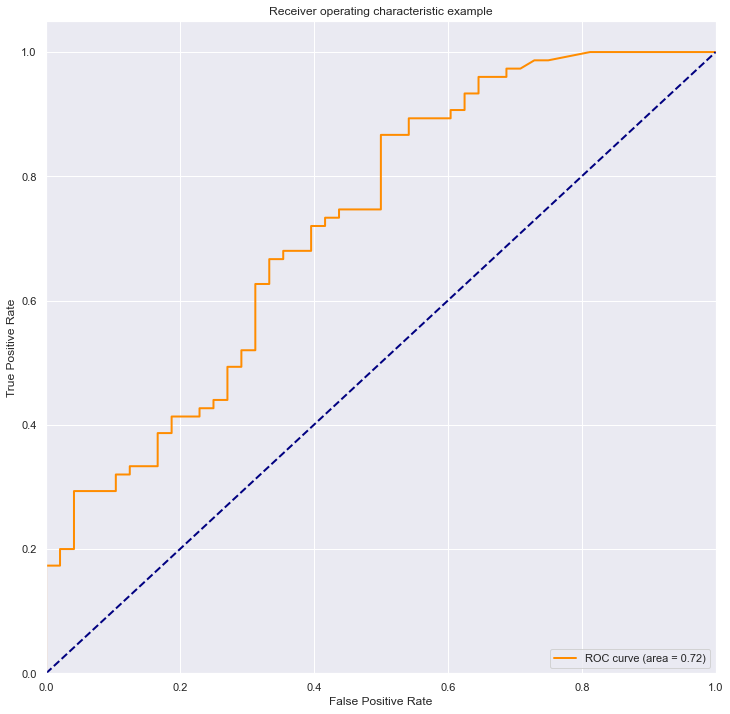

In [104]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color = 'darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc = 'lower right')
plt.show()

# 

# 

# Adaptive Boosting

In [105]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [157]:
ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth = 9), n_estimators = 200, random_state = 6)

In [158]:
adaFit = ada.fit(x_trainos, y_trainos)

In [159]:
adaFit

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=9),
                   n_estimators=200, random_state=6)

In [160]:
y_predADA = ada.predict(x_test)

In [161]:
y_predADA

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1])

In [162]:
pd.crosstab(y_test, y_predADA, margins = True, rownames = ['Actual'], colnames = ['Predict'])

Predict,0,1,All
Actual,,,
0,19,29,48
1,7,68,75
All,26,97,123


In [163]:
print(classification_report(y_test, y_predADA))

              precision    recall  f1-score   support

           0       0.73      0.40      0.51        48
           1       0.70      0.91      0.79        75

    accuracy                           0.71       123
   macro avg       0.72      0.65      0.65       123
weighted avg       0.71      0.71      0.68       123



In [164]:
predP_ADA = adaFit.predict_proba(x_test)[:, 1]

In [165]:
predP_ADA

array([5.61171458e-03, 9.85607037e-01, 9.96414264e-01, 1.00000000e+00,
       9.99999983e-01, 9.99999995e-01, 9.99998841e-01, 9.45818904e-01,
       9.99999995e-01, 9.87711554e-01, 9.99995693e-01, 2.43158214e-01,
       9.99904462e-01, 1.39102628e-04, 9.99961261e-01, 9.99999981e-01,
       9.99998676e-01, 9.99973768e-01, 3.19134714e-01, 9.99998403e-01,
       9.99999997e-01, 9.99534106e-01, 1.34249378e-08, 1.20636800e-07,
       1.00000000e+00, 3.75640301e-04, 9.34778310e-01, 9.99983240e-01,
       1.00000000e+00, 9.99999968e-01, 9.99996452e-01, 4.57757784e-04,
       3.20186371e-08, 9.73675031e-01, 9.99999991e-01, 9.99999414e-01,
       1.88783298e-05, 9.99992696e-01, 1.00000000e+00, 9.99999998e-01,
       9.97194766e-01, 1.00000000e+00, 1.99704525e-02, 9.99996772e-01,
       1.30032015e-01, 9.99999849e-01, 1.00000000e+00, 5.64284301e-01,
       3.66618657e-01, 9.99999662e-01, 9.99999999e-01, 5.18867766e-08,
       9.93625570e-01, 9.99999881e-01, 1.60985080e-06, 9.99997269e-01,
      

In [166]:
false_positive_rateADA, true_positive_rateADA, thresholdsADA = roc_curve(y_test, predP_ADA)

In [167]:
roc_aucADA = metrics.auc(false_positive_rateADA, true_positive_rateADA)

In [168]:
roc_aucADA

0.7277777777777777

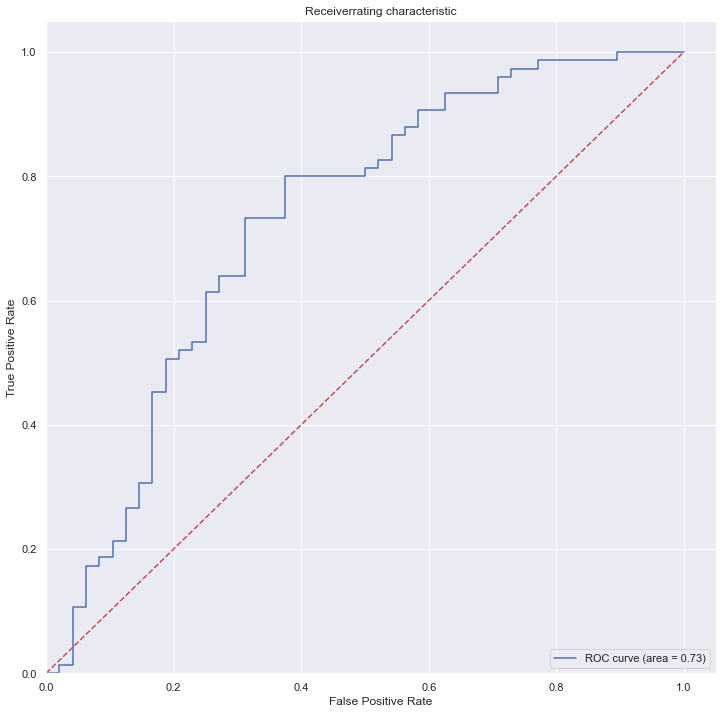

In [169]:
plt.figure()
plt.plot(false_positive_rateADA, true_positive_rateADA, label = 'ROC curve (area = %0.2f)' % roc_aucADA)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiverrating characteristic')
plt.legend(loc = 'lower right')
plt.show()